# Analyzing the `.log` files 

In [1]:
import pandas as pd
import numpy as np

In [3]:
n_cores = np.array([20, 20, 24, 24, 24, 24, 32, 32, 32, 36, 36, 40, 40, 48, 48, 48, 48, 50, 64, 64, 64, 64, 72, 72])
n_mpiprocs = np.array([10, 4, 24, 12, 6, 4, 16, 8, 4, 18, 6, 20, 10, 24, 12, 8, 6, 10, 32, 16, 8, 4, 36, 18])
ns_per_day = np.array([20.602, 20.764, 24.395, 17.011, 16.526, 56.670, 31.420, 37.354, 35.535, 43.960, 39.456, 42.210, 36.405, 45.980, 54.266, 53.265, 50.344, 52.261, 55.332, 74.090, 68.866, 64.361, 72.778, 74.275])
hours_per_ns = np.array([1.165, 1.156, 0.984, 1.411, 1.452, 0.424, 0.764, 0.643, 0.675, 0.546, 0.608, 0.569, 0.659, 0.522, 0.442, 0.451, 0.477, 0.459, 0.434, 0.324, 0.349, 0.373, 0.330, 0.323])

In [4]:
# Posso fare un plot in cui ad ogni punto associo una coppia

d = {'ncpus': n_cores, 'mpiprocs': n_mpiprocs, 'ns/day': ns_per_day, 'hours/ns': hours_per_ns}
df = pd.DataFrame(data=d)
df

,ncpus,mpiprocs,ns/day,hours/ns
0,20,10,20.602,1.165
1,20,4,20.764,1.156
2,24,24,24.395,0.984
3,24,12,17.011,1.411
4,24,6,16.526,1.452
5,24,4,56.670,0.424
6,32,16,31.420,0.764
7,32,8,37.354,0.643
8,32,4,35.535,0.675
9,36,18,43.960,0.546


In [17]:
#specify path for export
path = "/Users/giuseppegambini/Desktop/TESI/simulations/benchmarks/benchmarks_nmRec/nmRec_bias.txt"
#export DataFrame to text file
with open(path, 'a') as f:
    df_string = df.to_string(header=False, index=False)
    f.write(df_string)

In [4]:
import matplotlib.pyplot as plt

In [6]:
z = []
for i in range(len(n_cores)):
    z.append('(' + str(n_cores[i]) + ', ' + str(n_mpiprocs[i]) + ')')

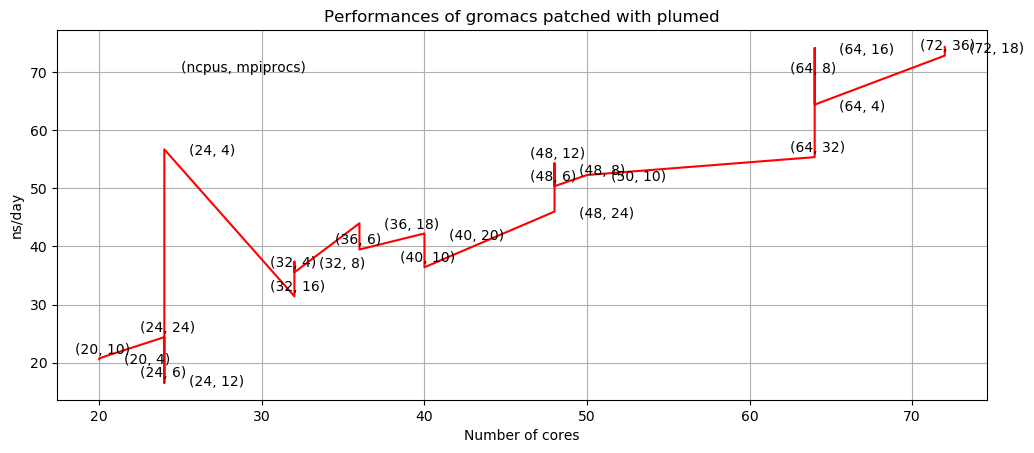

In [21]:
plt.figure().set_figwidth(12)
plt.plot(df["ncpus"], df["ns/day"], 'r')

for i in range(1, len(n_mpiprocs), 2):
    plt.text(df["ncpus"][i] + 1.5, df["ns/day"][i] - 1, z[i])
# qua puoi aggiungerci le labels e allungare il plot 

for i in range(0, len(n_mpiprocs), 2):
    plt.text(df["ncpus"][i] - 1.5, df["ns/day"][i] + 1, z[i])

plt.grid()
plt.xlabel("Number of cores")
plt.ylabel("ns/day")
plt.title("Performances of gromacs patched with plumed")
plt.savefig("/Users/giuseppegambini/Desktop/TESI/simulations/benchmarks/benchmarks_nmRec/performance_metadynamics.png")

# Analyzing the GPUs performance

In [2]:
n_cores = np.array([4, 4, 5, 6, 8, 8, 8, 12, 12, 20, 20, 24, 24, 24, 24])
n_mpiprocs = np.array([2, 1, 1, 1, 4, 2, 1, 6, 2, 4, 2, 24, 12, 6, 4])
ns_per_day = np.array([28.453, 15.686, 15.830, 53.585, 39.441, 17.429, 11.642, 86.302, 26.491, 55.851, 26.138, 25.109, 40.853, 83.654 , 96.059])
hours_per_ns = np.array([0.843, 1.530, 1.516, 0.448, 0.609, 1.377, 2.061, 0.278, 0.906, 0.430, 0.918, 0.956, 0.587, 0.287, 0.250])

In [6]:
d = {'ncpus': n_cores, 'mpiprocs': n_mpiprocs, 'ns/day': ns_per_day, 'hours/ns': hours_per_ns}
df = pd.DataFrame(data=d)
df

,ncpus,mpiprocs,ns/day,hours/ns
0,4,2,28.453,0.843
1,4,1,15.686,1.530
2,5,1,15.830,1.516
3,6,1,53.585,0.448
4,8,4,39.441,0.609
5,8,2,17.429,1.377
6,8,1,11.642,2.061
7,12,6,86.302,0.278
8,12,2,26.491,0.906
9,20,4,55.851,0.430


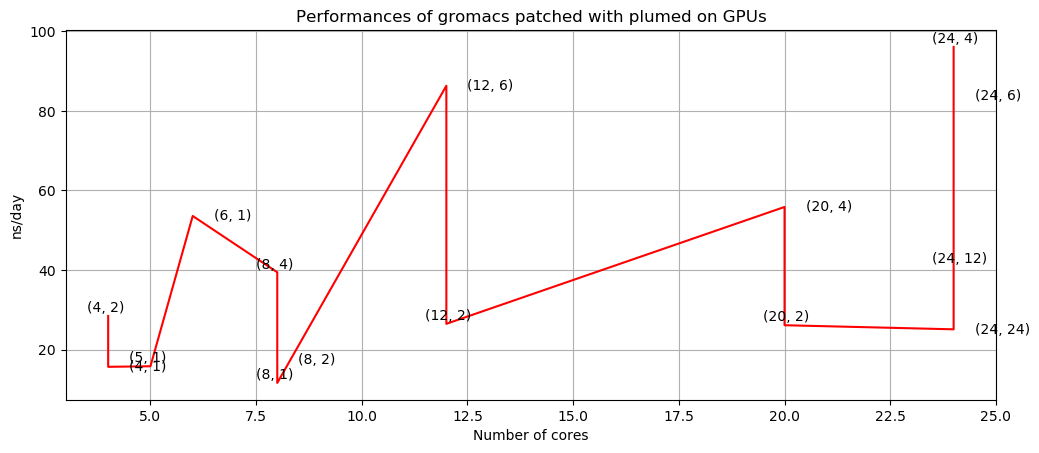

In [10]:
z = []
for i in range(len(n_cores)):
    z.append('(' + str(n_cores[i]) + ', ' + str(n_mpiprocs[i]) + ')')

plt.figure().set_figwidth(12)
plt.plot(df["ncpus"], df["ns/day"], 'r')

for i in range(1, len(n_mpiprocs), 2):
    plt.text(df["ncpus"][i] + 0.5, df["ns/day"][i] - 1, z[i])
# qua puoi aggiungerci le labels e allungare il plot 

for i in range(0, len(n_mpiprocs), 2):
    plt.text(df["ncpus"][i] - 0.5, df["ns/day"][i] + 1, z[i])

plt.grid()
plt.xlabel("Number of cores")
plt.ylabel("ns/day")
plt.title("Performances of gromacs patched with plumed on GPUs")
plt.savefig("/Users/giuseppegambini/Desktop/TESI/simulations/benchmarks/benchmarks_nmRec/performance_metadynamics_GPU.png")

In [11]:
#specify path for export
path = "/Users/giuseppegambini/Desktop/TESI/simulations/benchmarks/benchmarks_nmRec/nmRec_bias_GPU.txt"
#export DataFrame to text file
with open(path, 'a') as f:
    df_string = df.to_string(header=False, index=False)
    f.write(df_string)